In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data = pd.read_csv('day (1).csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
data.shape

(730, 16)

In [11]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [15]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [17]:
data.ndim

2

In [19]:
# will drop the columns which are not useful for our analysis.
# 'dteday' column inculding with day,month,year and in our data set year,month are alreay given.
# so will create a one column for date than we can drop this column.

data['days_old'] = (pd.to_datetime(data['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [21]:
data.drop(['dteday'], axis = 1, inplace = True)

In [23]:
print(data.columns)

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'days_old'],
      dtype='object')


In [25]:
# now we can see another column is added the name as 'day'.
# appart from 'dteday' other columns are also which are not useful for our analysis like 'instant'.
# 'registered','casual'dropping both columns  as we have 'cnt' column which is sum of the both that is the target column.

data.drop(['casual','registered'],axis = 1,inplace = True)
data.head(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1


In [27]:
data.drop(['instant'],axis = 1,inplace = True)
data.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1


In [29]:
# will check the shape of data
data.shape

(730, 13)

In [31]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


In [33]:
data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

# Handle Outliers

In [35]:
data.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1


{'whiskers': [<matplotlib.lines.Line2D at 0x14a146dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x14a1b71d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14a13eb10>],
 'medians': [<matplotlib.lines.Line2D at 0x14a1cc5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14a1cce50>],
 'means': []}

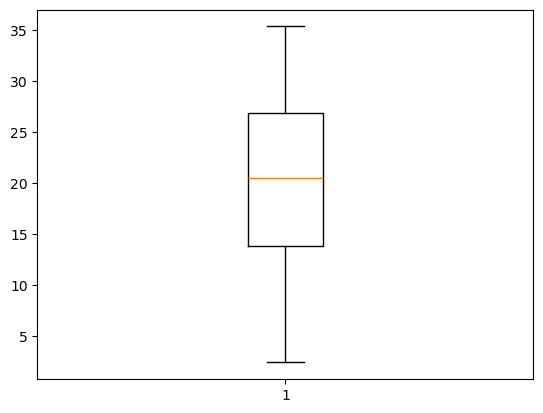

In [37]:
# now we will check outliers for continuous values.
plt.boxplot(data['temp'])

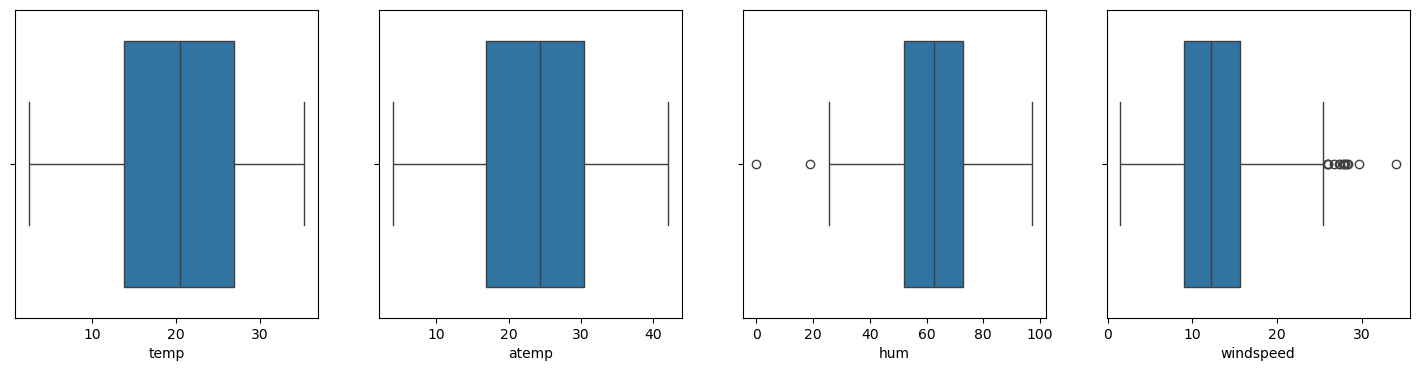

In [39]:
# 'temp' col does not have outlier like we will check outlier by plotting subplot.
plt.figure(figsize = (18,4))
plt.subplot(1,4,1)
sns.boxplot(data = data, x = 'temp')
plt.subplot(1,4,2)
sns.boxplot(data = data, x = 'atemp')
plt.subplot(1,4,3)
sns.boxplot(data = data, x = 'hum')
plt.subplot(1,4,4)
sns.boxplot(data = data, x = 'windspeed')
plt.show()

In [243]:
#From these plots, we can see there are no outliers to be handled.

# Visualising the data

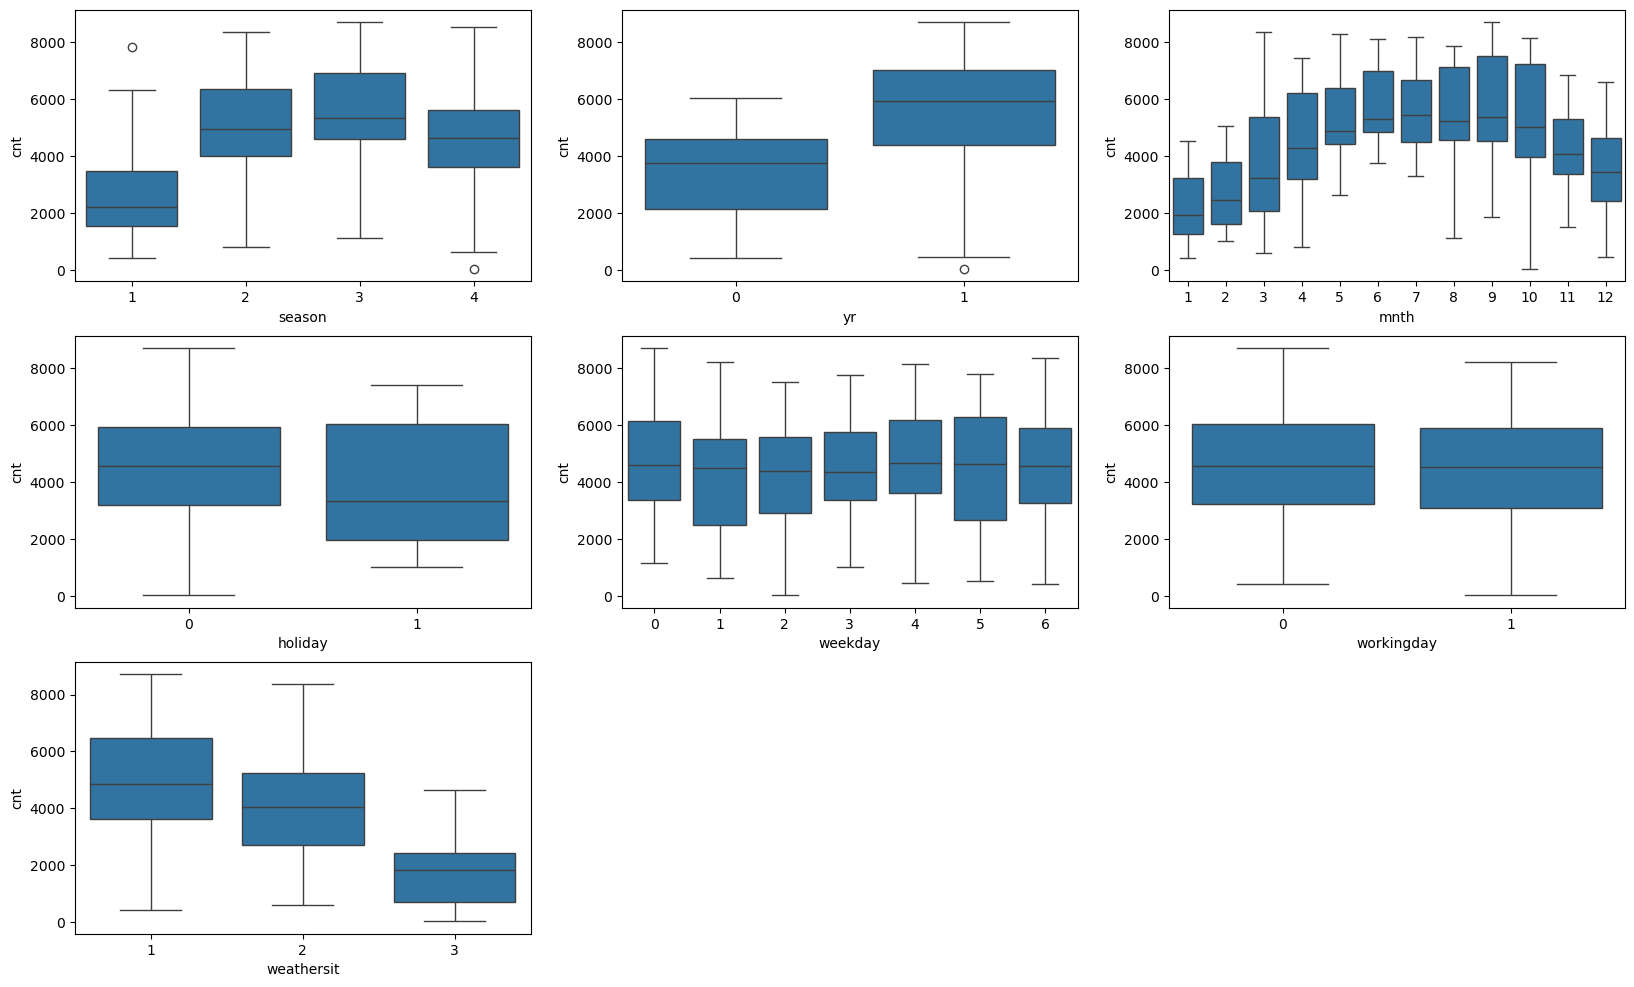

In [41]:
# as we have target variable 'cnt' -- count of total bikes.
# by this column we will analysis the data


# Visualising Categorical Variables

cat_val = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

In [247]:
# here we can demand for rental bikes---
# 1 Season 3 has highest demand for rental bikes.
# 2 can see that demand for next year has increaded.
# 3 for month can see from jan to jun demand getting incresed , september month has highest demand of bike,after september demand getting decrease.
   # During the year end and beginning, it is less, could be due to extereme weather conditions.
# 4 When there is a holiday, demand has decreased.
# 5. Weekday is not giving clear picture abount demand both looks similar.
# 6. workingdat also not giving claer picture.
#7. 1st weathershit has highest demand that is clear weather.

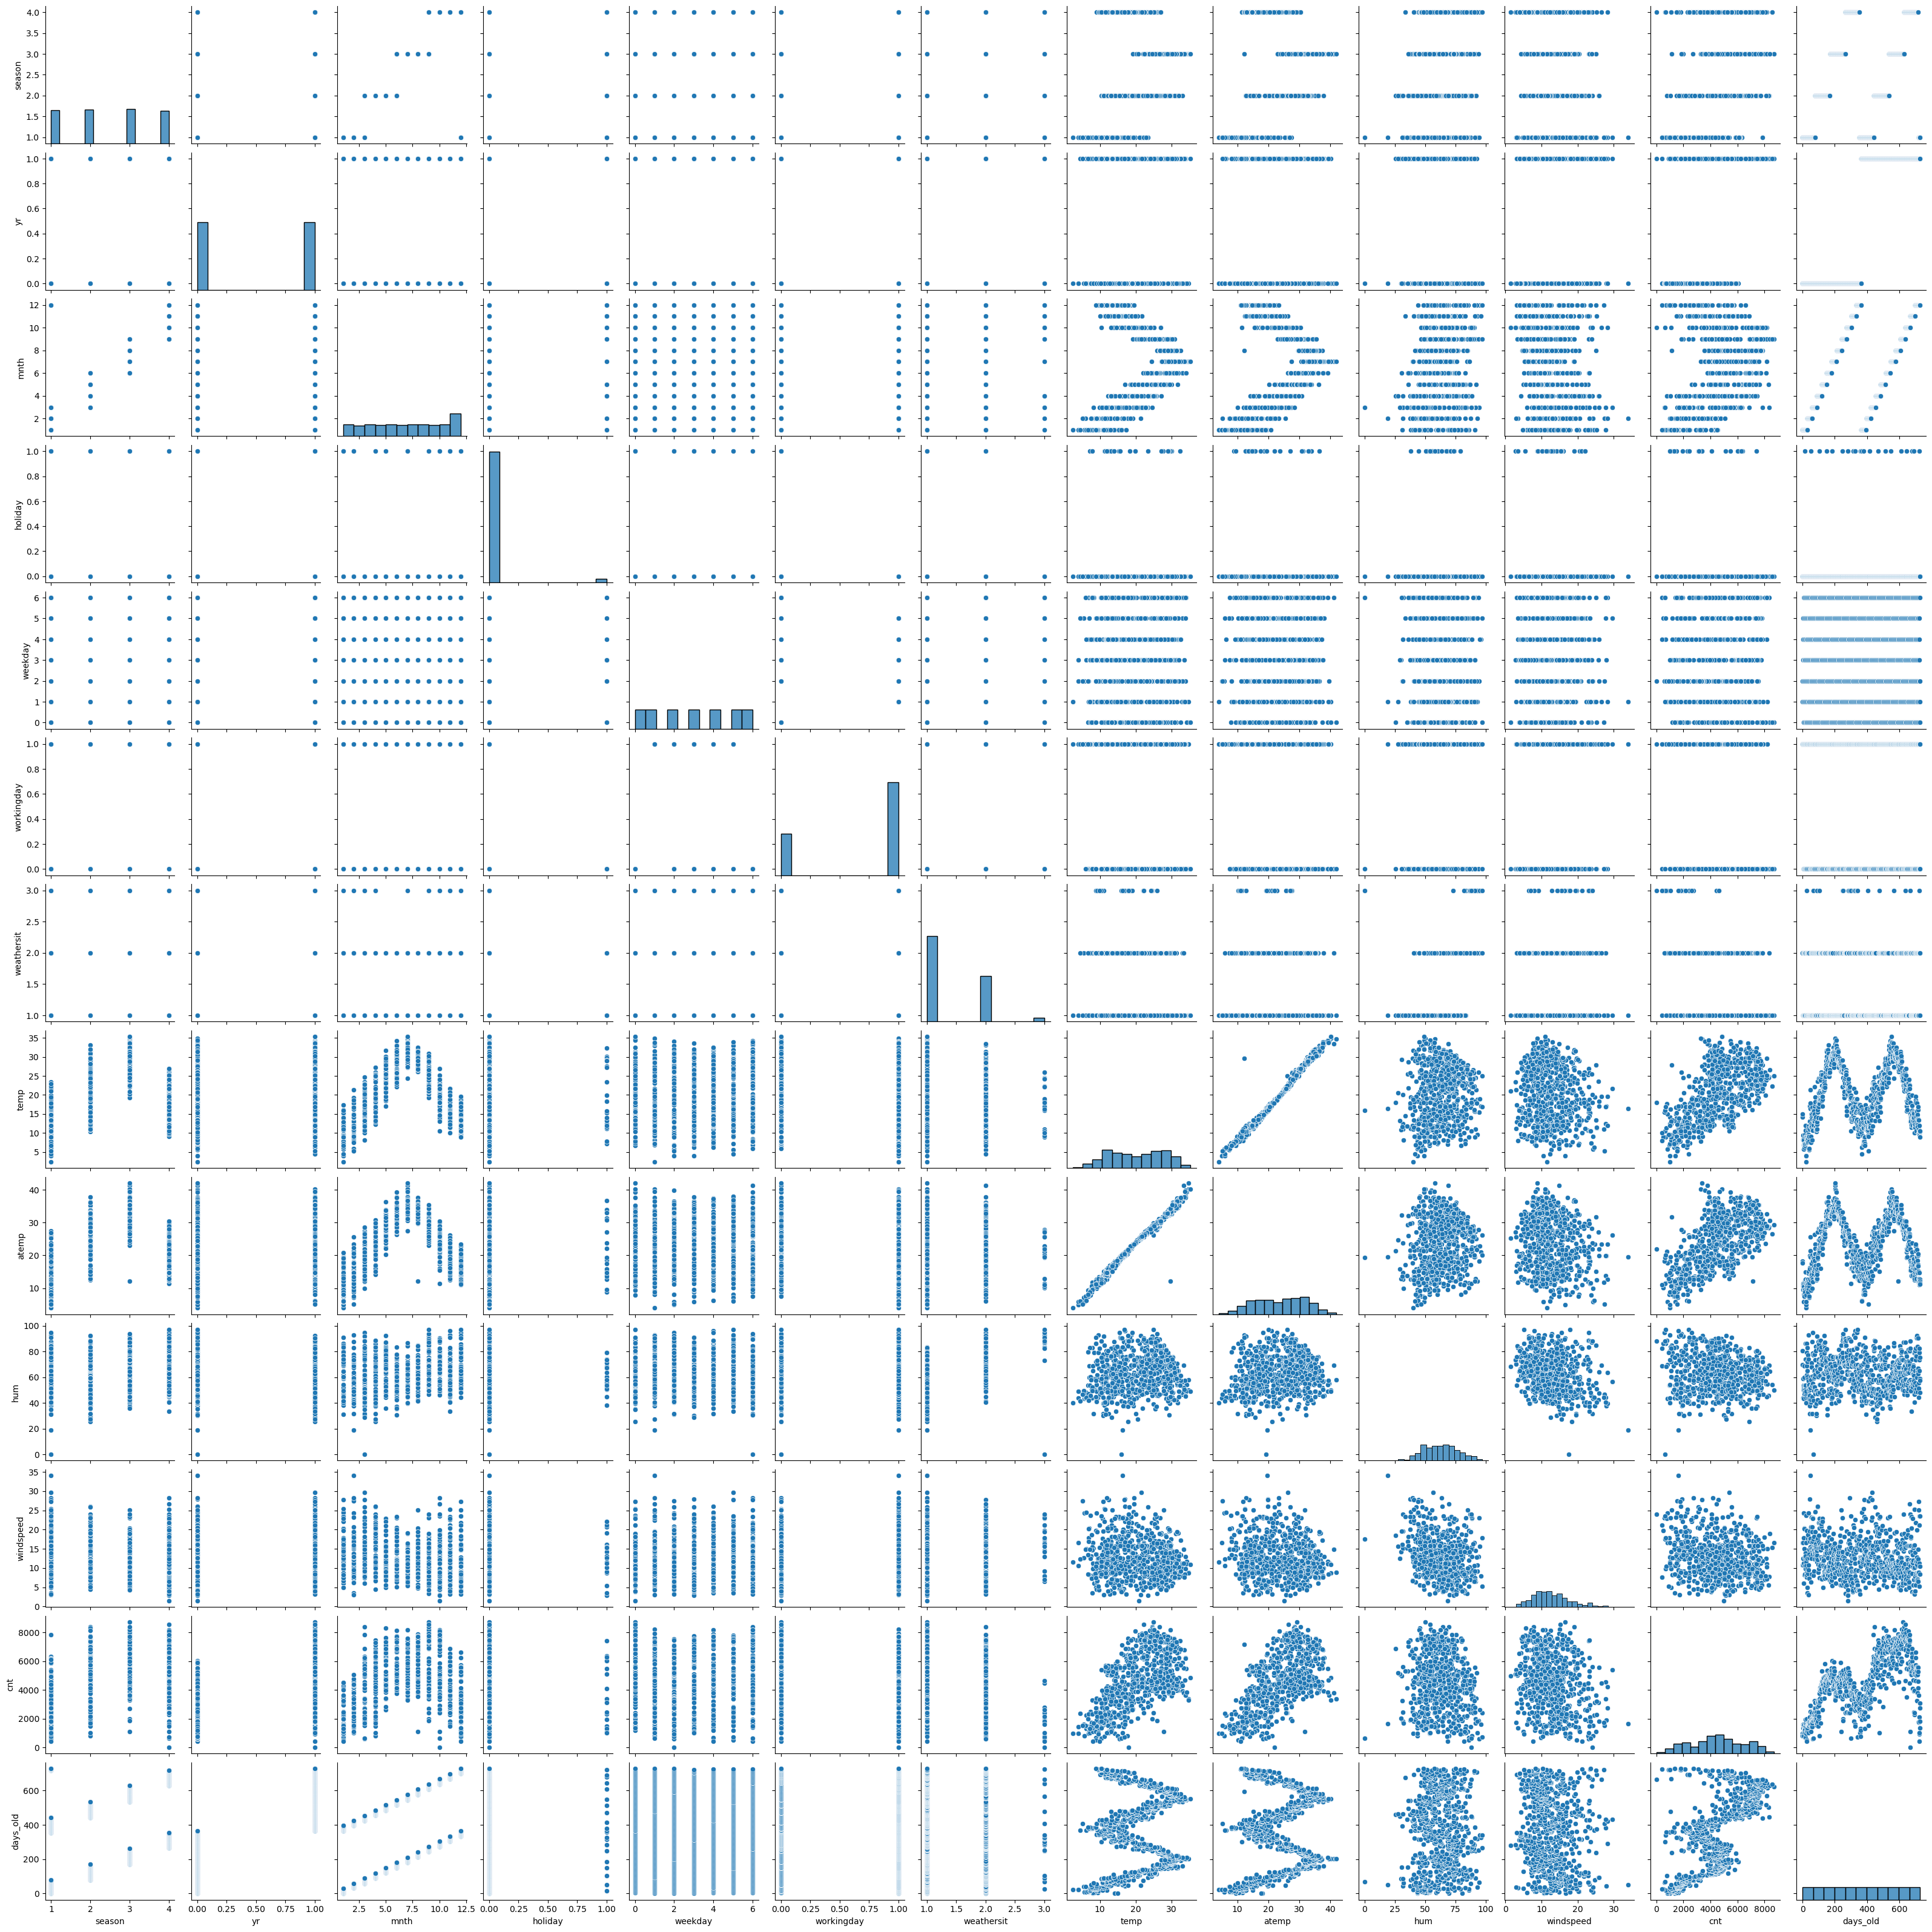

In [43]:
# Visualising numeric Variables

sns.pairplot(data)
plt.show()

<Figure size 1500x3000 with 0 Axes>

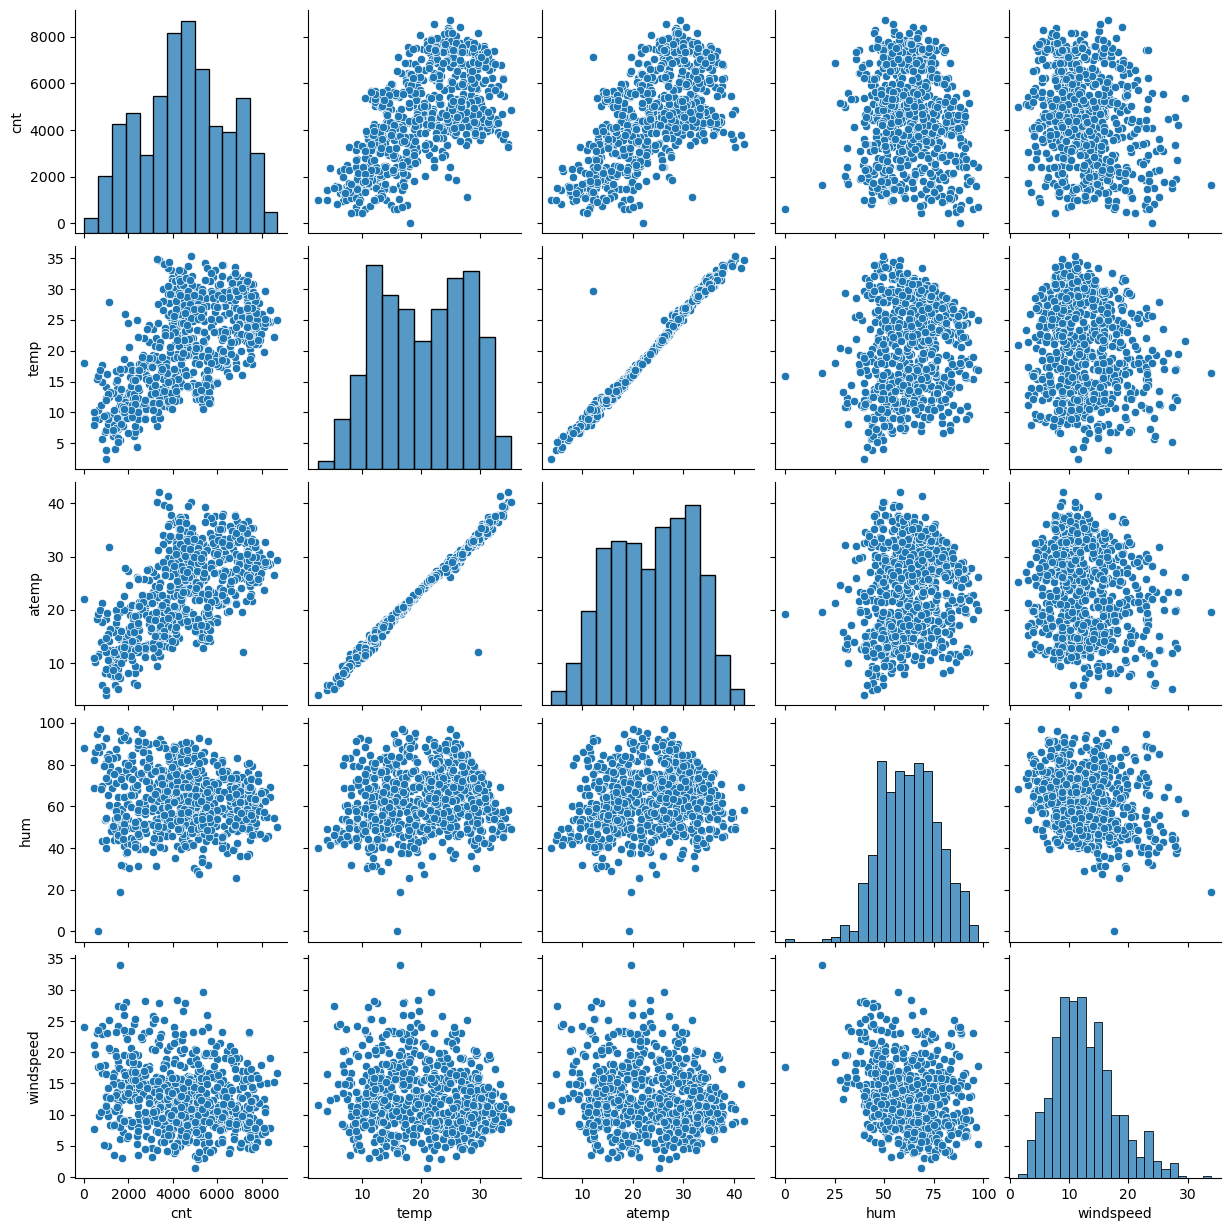

In [249]:
# this not giving good idea because it includes all numerical variable those are catergorical.
# will sort some columns than we will will plot paiplot.
plt.figure(figsize = (15,30))
sns.pairplot(data= data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [251]:
# by this plot can see atemp and temp are hghly co - related with each other.
# and target variable cnt has highest corelation with temp and atemp.

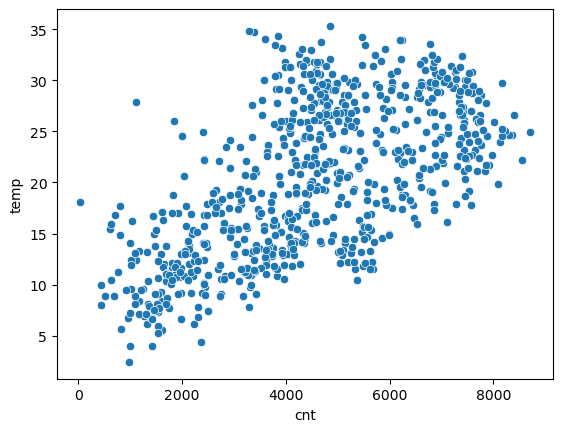

In [44]:
# now we will plot scatter plot to see corelation between variables.


sns.scatterplot(data = data, x = 'cnt',y = 'temp')
plt.show()

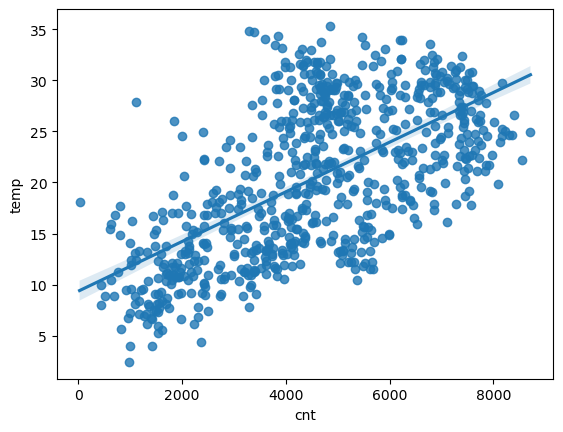

In [45]:
# we can regplot for batter understanding.
sns.regplot(data = data, x = 'cnt',y = 'temp')
plt.show()

In [257]:
# we can see demand for bikes is positively correlates to temp.
# we can see liner relation both of them .


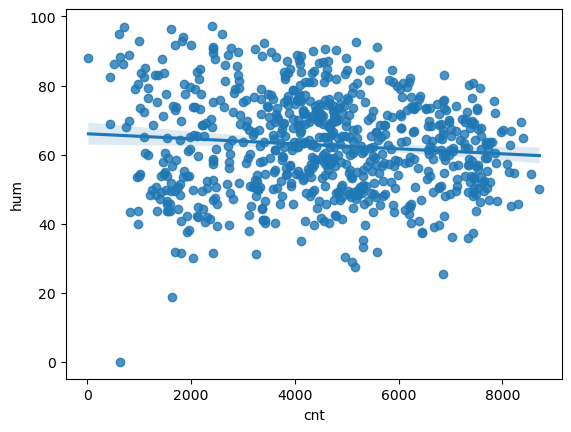

In [49]:
# now we will take 'cnt' and 'hum' 
sns.regplot(data = data, x = 'cnt',y = 'hum')
plt.show()

In [261]:
# not a good correlation both of them.
# we can say bike demand is decreasing, when hum is increased.

In [51]:
# Let's check the correlation coefficients to see which variables are highly correlated
data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.272230e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.272230e-16,1.000000e+00,-5.149955e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.149955e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


<Axes: >

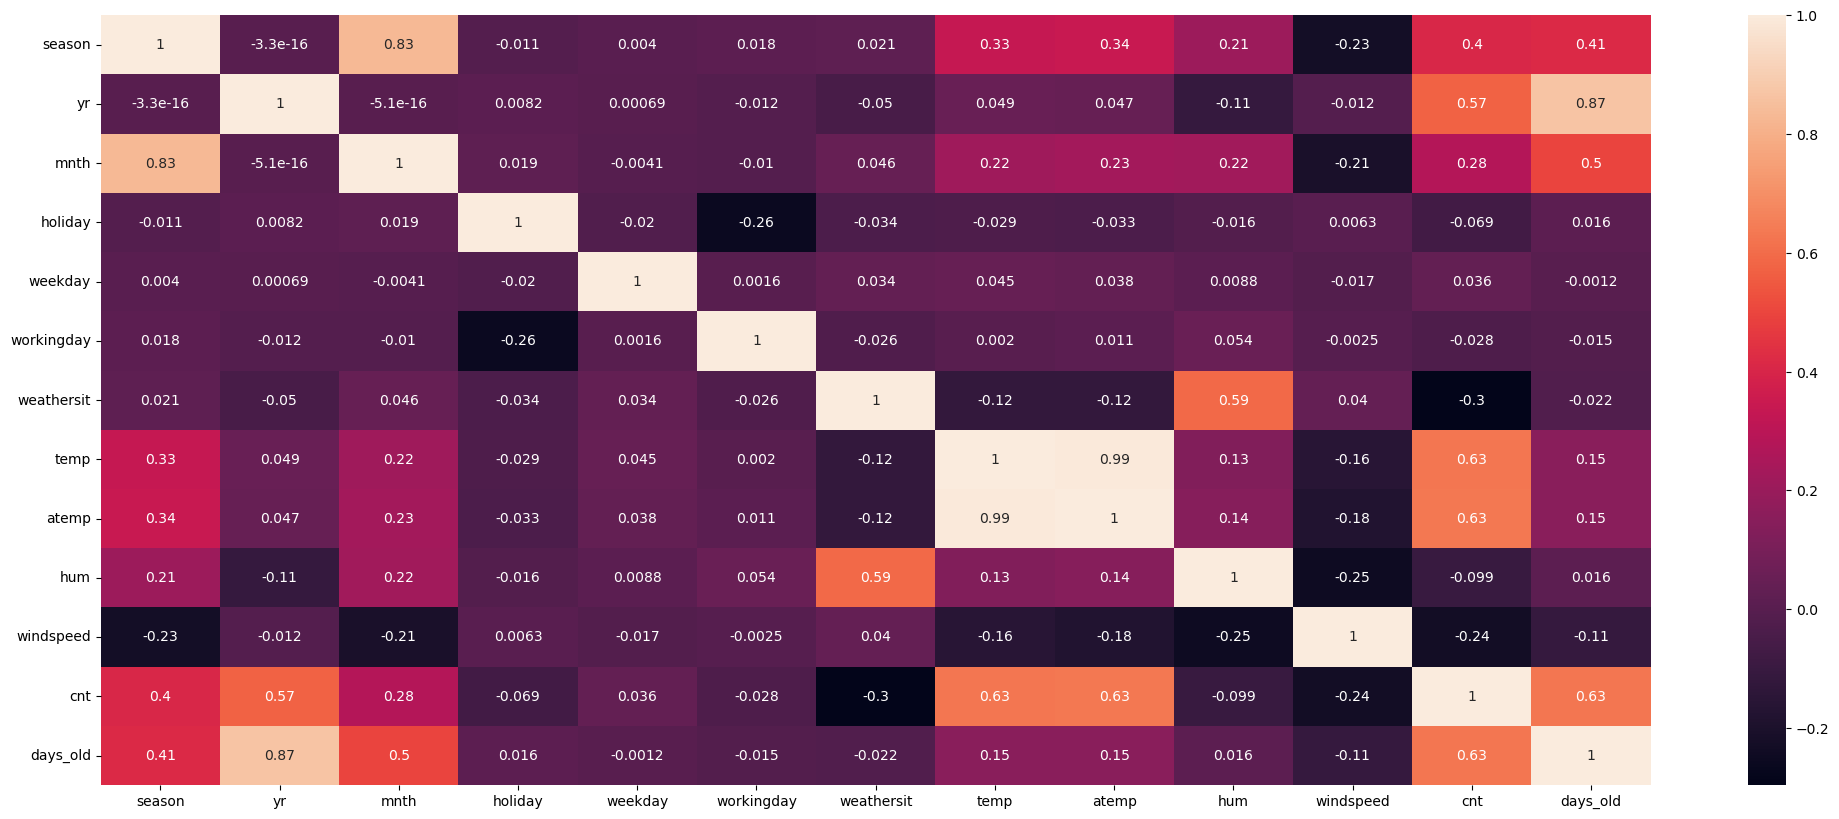

In [53]:
plt.figure(figsize = (25,10))
sns.heatmap(data.corr(),annot = True)

In [55]:
# it is not giving clear picture about categorical columns.
data.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1


In [59]:
data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [61]:
# we can see season 1,2,3,4 has converted in 1:spring, 2:summer, 3:fall, 4:winter.
# likewise we have another columns as well lets find out .
# month,weekday,weathersit we have three columns will convert those as well.

data.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [63]:
data.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [65]:
# here we can see month wise list likewise will check for another columns as well and will replace the values as per Dataset characteristicsr.
data.mnth.replace({1:'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace = True)
data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
data.weathersit.replace({1:'good',2:'moderate',3:'bad'},inplace = True)
data.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1


In [67]:
var_cols = ['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt','days_old']
data[var_cols].corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,-0.112667
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000,0.629896
days_old,0.866026,0.016275,-0.015171,0.150738,0.152773,0.016080,-0.112667,0.629896,1.000000


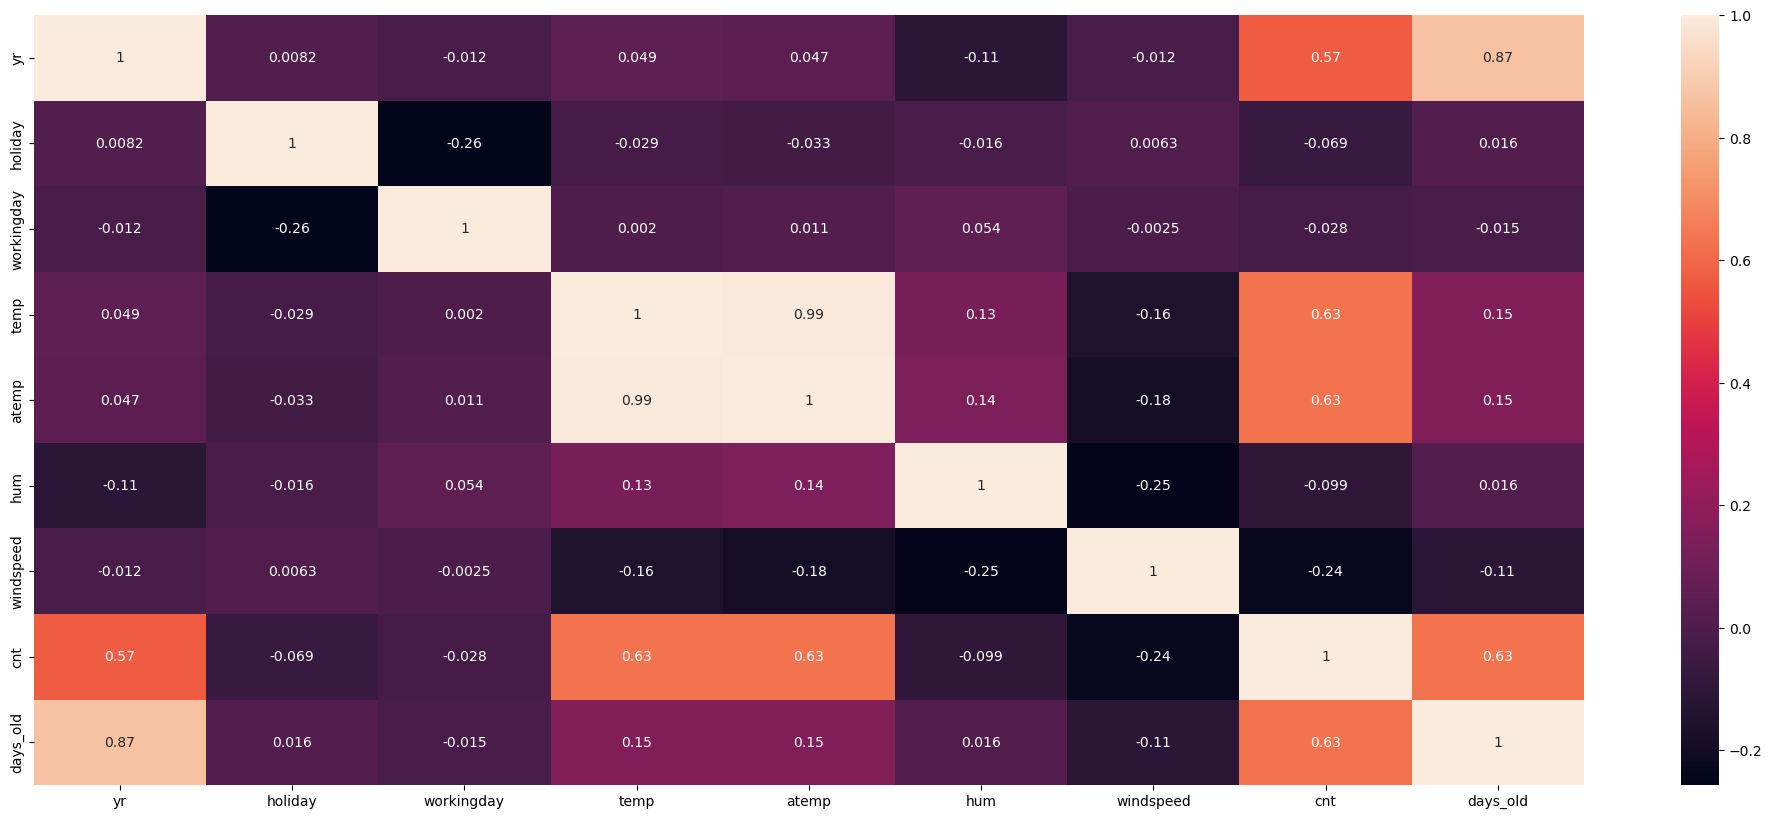

In [69]:
plt.figure(figsize=(25,10))
sns.heatmap(data[var_cols].corr(),annot = True)
plt.show()

In [281]:
# by this map we can see cnt has highly corr with days_old,atemp,temp.
# We also see Target variable has a linear relationship with some of the indeptendent variables. 
#Good sign for building a linear regression Model.

In [71]:
data.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1


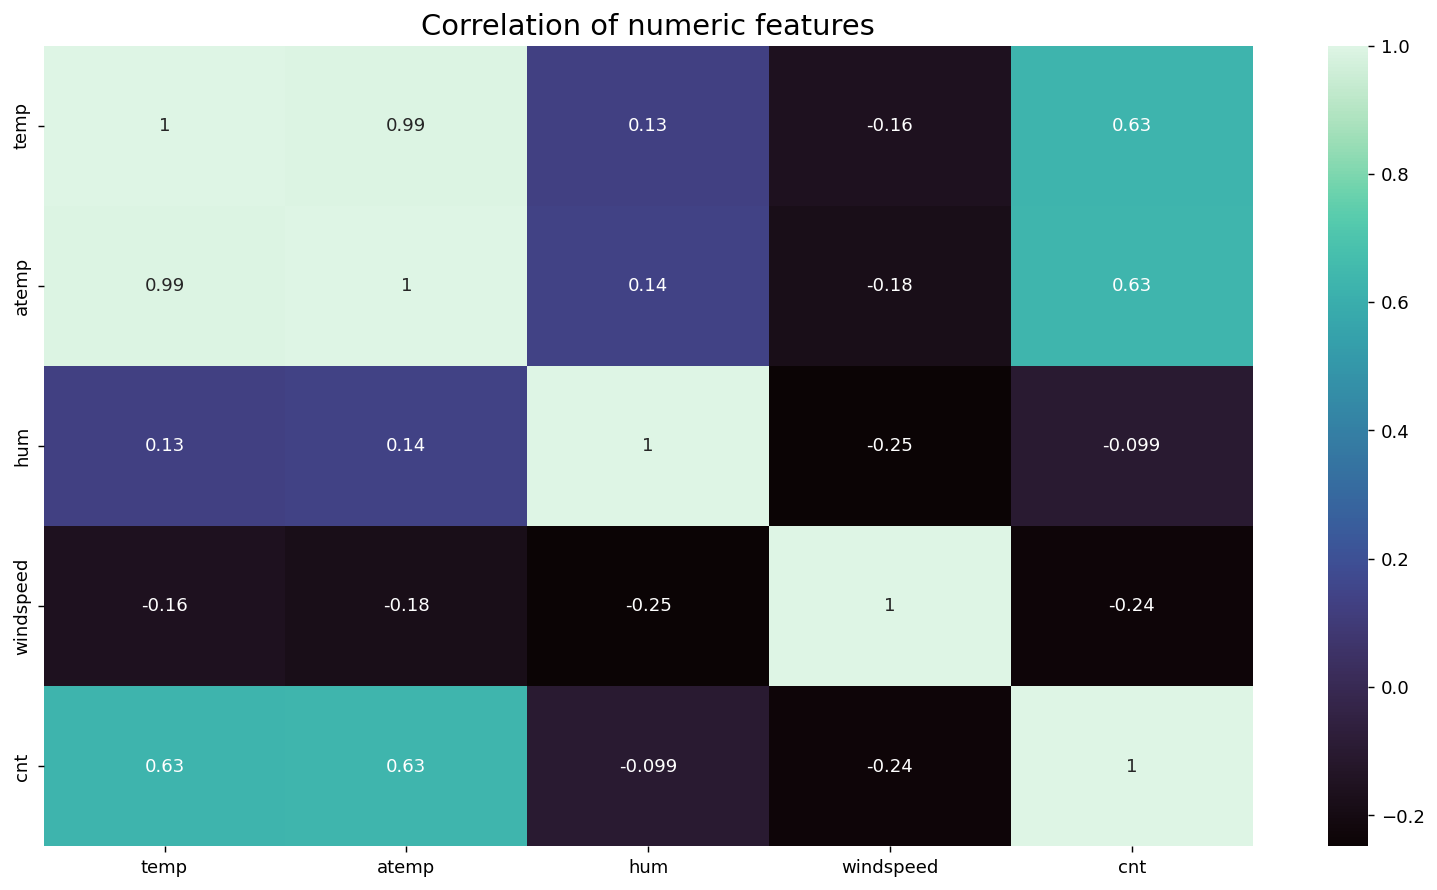

In [73]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(data[num_features].corr(),annot= True,cmap="mako")
plt.show()

In [287]:
# by this map we can see atemp and temp are highly correlated with each other ,we can take an action to remove one of them, but lets keep them for further analysis.
#Temp and Atemp also have high correlation with cnt variable.

# Preparing the data for modelling

In [91]:
# Encoding :-
     #Converting binary vars to 1/0
     #Other categorical vars to dummy vars

In [75]:
data.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1


In [77]:
data.shape

(730, 13)

In [79]:
# here we can see 'season','month','weekday','weathersit'those are categorical columns we will convert those in dummy vars.
# as we can see in Dataset characteristics where weathersit has four features so we will not drop first column.

var_list = ['season','mnth','weekday','weathersit']


status = pd.get_dummies(data[["season", "mnth", "weekday"]], dtype = 'int',drop_first=True)
status.head(2)


,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [81]:
status.shape

(730, 20)

In [83]:
status1 = pd.get_dummies(data["weathersit"],dtype = 'int')
status1

,bad,good,moderate
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
725,0,0,1
726,0,0,1
727,0,0,1
728,0,1,0


In [85]:
data1 = pd.concat([data,status],axis = 1)
data1.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0


In [87]:
data1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_march', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [89]:
data2 = pd.concat([data1,status1],axis = 1)
data2.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,bad,good,moderate
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,...,0,1,0,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,0,1


In [91]:
data2.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_march', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'bad', 'good', 'moderate'],
      dtype='object')

In [93]:
data2.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_march', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'bad', 'good', 'moderate'],
      dtype='object')

In [95]:
del data2['season']

In [97]:
del data2['mnth']

In [99]:
del data2['weekday']

In [101]:

del data2['weathersit']


In [103]:
data2.shape

(730, 32)

In [319]:
data2.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,bad,good,moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1


# Split into train and test

In [109]:
import sklearn 
from sklearn.model_selection import train_test_split

In [111]:
data2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'bad', 'good', 'moderate'],
      dtype='object')

In [113]:
df_train, df_test = train_test_split(data2, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling the features

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
#Use Normalized scaler to scale
scaler = MinMaxScaler()

In [119]:
# creat list for continuous variables for scalling
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','days_old','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [121]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,bad,good,moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0.896978,0,...,0,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.791209,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.585165,1,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1.000000,1,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.662088,0,...,0,0,0,1,0,0,0,0,0,1


In [123]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'bad', 'good', 'moderate'],
      dtype='object')

In [125]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,bad,good,moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.505414,0.243137,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.627451,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.288281,0.429398,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.255838,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.510989,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.759272,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing into X and Y sets for the model building

In [127]:
y_train = df_train.pop('cnt')
X_train = df_train

# Build a Model using RFE and Automated approach

In [129]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [131]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)           
rfe = rfe.fit(X_train, y_train)

In [133]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 12),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 15),
 ('mnth_march', False, 17),
 ('mnth_may', False, 8),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 14),
 ('bad', True, 1),
 ('good', True, 1),
 ('moderate', True, 1)]

In [135]:
#Print Columns selected by RFE. We will start with these columns for manual elimination

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_july', 'mnth_nov',
       'mnth_sep', 'bad', 'good', 'moderate'],
      dtype='object')

In [137]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'days_old', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_oct', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [139]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head(2)

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jan,mnth_july,mnth_nov,mnth_sep,bad,good,moderate
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,1,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,1,0


In [141]:
X_train_rfe.shape

(510, 15)

In [143]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Manual elimination

In [145]:
# Adding a constant variable 
# Function to build a model using statsmodel api
import statsmodels.api as sm 

# Model 1

In [147]:
X_train_sm = sm.add_constant(X_train[col])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
   

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          2.25e-189
Time:                        13:49:44   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1533      0.029      5.273

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
13,good,49.16
14,moderate,32.33
5,season_spring,5.20
12,bad,4.16
2,temp,3.97
7,season_winter,3.77
6,season_summer,2.67
3,hum,1.91
8,mnth_jan,1.57
9,mnth_july,1.49


In [390]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.

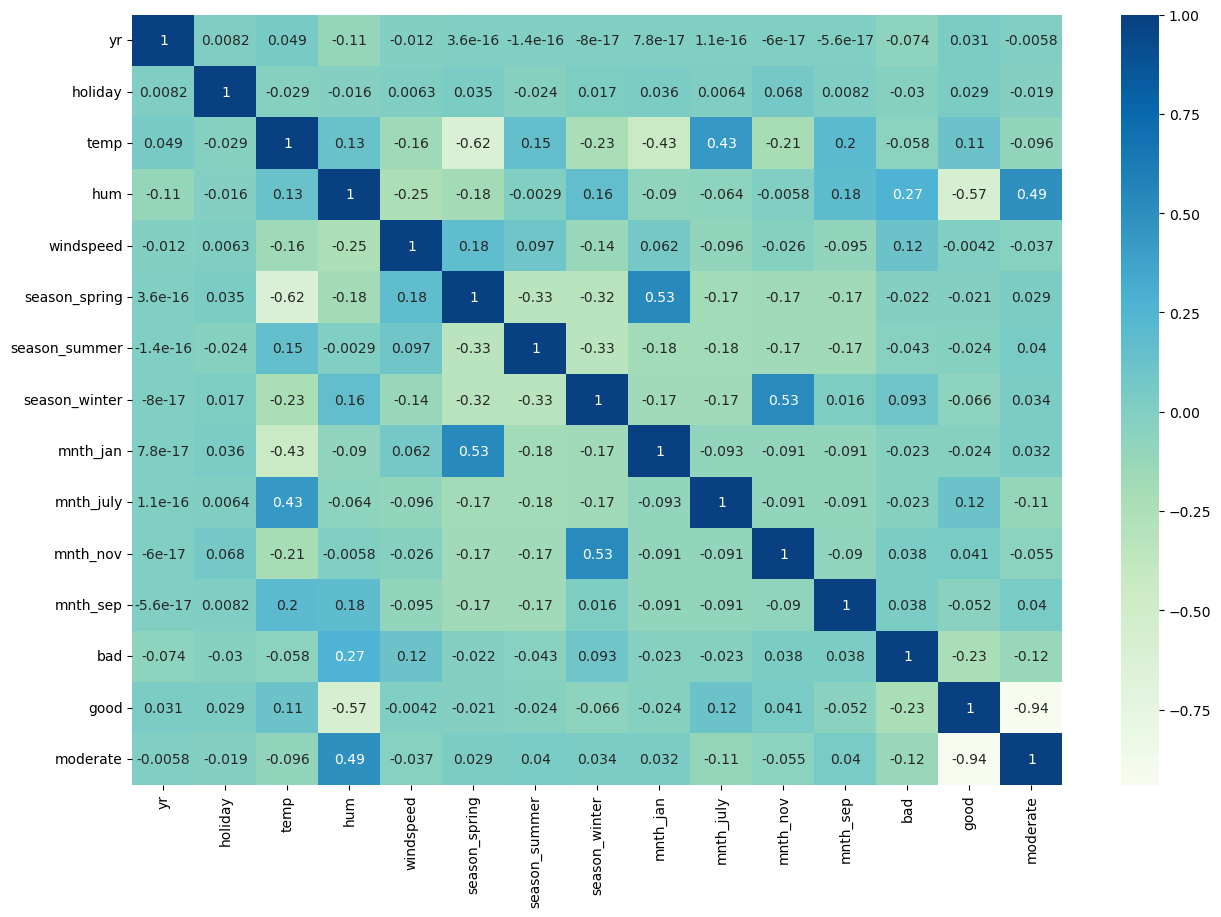

In [151]:
plt.figure(figsize = (15,10))
sns.heatmap(data2[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_july', 'mnth_nov',
       'mnth_sep', 'bad', 'good', 'moderate']].corr(), cmap='GnBu', annot=True)
plt.show()



# MODEL 2

In [153]:
# Dropping the variable mnth_jan is insignificant as it has high p-value.

X_train[col].head(2)

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jan,mnth_july,mnth_nov,mnth_sep,bad,good,moderate
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,1,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,1,0


In [155]:
X_train[col].shape

(510, 15)

In [157]:
# Dropping the variable 'mnth_jan' as it has negative coefficient and is insignificant as it has high p-value
X_train_new = X_train[col].drop(['mnth_jan'],axis =1)
X_train_new.head(2)

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_july,mnth_nov,mnth_sep,bad,good,moderate
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,1,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1,0


In [159]:
X_train_new.shape

(510, 14)

In [403]:
# now 'mnth_jan' column has dropped will check again p value and VIF for all remaining columns.

In [161]:
X_train_sm1 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_sm1).fit()
print(lm.summary())
   

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          9.74e-190
Time:                        13:50:06   Log-Likelihood:                 510.48
No. Observations:                 510   AIC:                            -993.0
Df Residuals:                     496   BIC:                            -933.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1447      0.029      5.024

In [163]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,good,47.59
13,moderate,31.46
5,season_spring,5.14
11,bad,4.12
2,temp,3.69
7,season_winter,3.67
6,season_summer,2.65
3,hum,1.90
8,mnth_july,1.48
9,mnth_nov,1.48


In [ ]:
# as we can see by dropping off 'mnth_jan' column the value of VIF columns also get decreased.

# MODEL 3

In [165]:
# now we have 'mnth_nov' has high p value ,will drop this column   

In [167]:
# Dropping the variable 'days_old' as it has negative coefficient and is insignificant as it has high p-value


X_train_new1 = X_train_new.drop(['mnth_nov'],axis =1)
X_train_new1.head(2)

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_july,mnth_sep,bad,good,moderate
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,1,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0


In [169]:
X_train_new1.shape

(510, 13)

In [171]:
X_train_sm2 = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train, X_train_sm2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.69e-190
Time:                        13:50:32   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1400      0.029      4.889

In [173]:
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,good,46.67
12,moderate,30.98
5,season_spring,5.02
10,bad,4.09
2,temp,3.61
7,season_winter,3.49
6,season_summer,2.61
3,hum,1.90
8,mnth_july,1.48
9,mnth_sep,1.30


In [175]:
X_train_new1.head(2)

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_july,mnth_sep,bad,good,moderate
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,1,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0


In [177]:
X_train_new1.shape

(510, 13)

In [426]:
# we can see now  p- values are less than 0.05 for all columns .
# now will check vif columns will drop those columns those are having value more than 5.
# and will check which column is useful for our rental bike prediction.


# MODEL 4

In [179]:
# Dropping the variable 'good' as it has high VIF value.
X_train_new2 = X_train_new1.drop(['good'],axis =1)
X_train_new2.head(2)

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_july,mnth_sep,bad,moderate
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0


In [181]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,season_spring,4.01
7,season_winter,3.35
6,season_summer,2.78
11,moderate,2.28
0,yr,2.08
8,mnth_july,1.58
9,mnth_sep,1.38


# Model 5

In [183]:
X_train_new3 = X_train_new2.drop(['hum'],axis =1)
X_train_new3.head(2)

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_july,mnth_sep,bad,moderate
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,1,0,0,0


In [185]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_summer,2.21
4,season_spring,2.08
0,yr,2.07
6,season_winter,1.79
7,mnth_july,1.58
10,moderate,1.55
8,mnth_sep,1.34
9,bad,1.08


X_train_sm4 = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train, X_train_sm4).fit()
print(lm.summary())

In [191]:
X_train_sm4 = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train, X_train_sm4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          2.40e-187
Time:                        13:51:25   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1996      0.030      6.758

In [193]:
X_train_sm4.head(2)

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_july,mnth_sep,bad,moderate
653,1.0,1,0,0.509887,0.300794,0,0,1,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,1,0,0,0


In [195]:
X_train_sm4.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_july', 'mnth_sep', 'bad',
       'moderate'],
      dtype='object')

In [442]:
# Now as you can see, the VIFs and p-values both are within an acceptable range. 
# So we go ahead and make our predictions using this model only.

# Residual Analysis of the train data

In [445]:
# So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression),
# let us plot the histogram of the error terms and see what it looks like.


In [197]:
y_train_pred = lm.predict(X_train_sm4)

/var/folders/b7/lbcttfvx5hv5n3y93_5xfdnm0000gn/T/ipykernel_60911/429860727.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

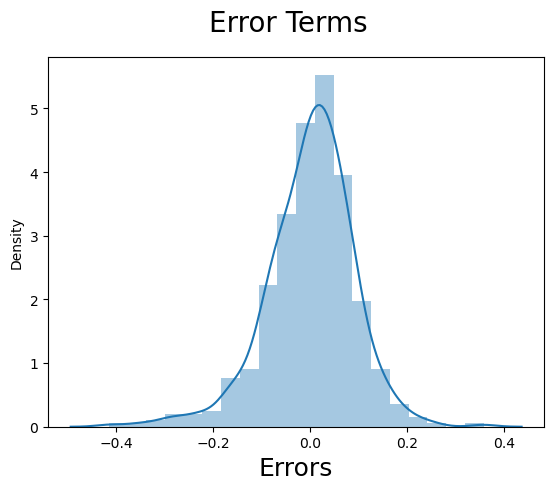

In [199]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)  

In [201]:
num_vars = ['temp','atemp','hum','windspeed','days_old','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])


# Prediction and evaluation on Test data set

In [203]:
num_vars = ['temp','atemp','hum','windspeed','days_old','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [205]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,bad,good,moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,-0.056692,-0.089797,0.006580,-0.080891,-0.002471,0.000671,0.255708,...,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.652968,0.319635
std,0.500722,0.188034,0.481313,0.007102,0.005720,0.001535,0.005132,0.000025,0.000403,0.437258,...,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.477117,0.467403
min,0.000000,0.000000,0.000000,-0.072263,-0.103108,0.002699,-0.092319,-0.002526,0.000006,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.062901,-0.094739,0.005433,-0.084576,-0.002488,0.000321,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,-0.056700,-0.089372,0.006469,-0.081337,-0.002471,0.000657,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,-0.050609,-0.085042,0.007666,-0.078013,-0.002454,0.001012,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,-0.043761,-0.078037,0.010327,-0.065037,-0.002420,0.001376,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing into X_test and y_test

In [207]:
y_test = df_test.pop('cnt')
X_test = df_test

In [209]:
# now will add constant to make prediction on X_test set.
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,bad,good,moderate
184,1.0,0,1,0,-0.048400,-0.083584,0.006774,-0.088243,0.000347,0,...,0,0,0,0,0,0,1,0,0,1
535,1.0,1,0,1,-0.046286,-0.081669,0.006287,-0.086013,0.001009,0,...,0,0,0,0,1,0,0,0,1,0
299,1.0,0,0,0,-0.058120,-0.090764,0.008632,-0.080222,0.000564,0,...,0,0,1,0,0,0,0,0,0,1
221,1.0,0,0,1,-0.046886,-0.082910,0.004504,-0.080050,0.000417,0,...,0,0,0,0,0,0,0,0,1,0
152,1.0,0,0,0,-0.048842,-0.084324,0.003239,-0.073702,0.000287,0,...,0,0,1,0,0,0,0,0,1,0


In [211]:
X_test_sm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'days_old', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_june', 'mnth_march', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'bad', 'good', 'moderate'],
      dtype='object')

In [471]:
# so in final model for train test we dont have all the varibales,so that for X_test also we have to drop some varibale which are not in final model.

In [213]:
X_test_sm = X_test_sm.drop(['workingday','atemp', 'hum','days_old','mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
                           'mnth_june', 'mnth_march', 'mnth_may', 'mnth_nov','mnth_oct','weekday_sat', 'weekday_sun',
                           'weekday_thu', 'weekday_tue', 'weekday_wed','weekday_mon','good'],axis = 1)





In [215]:
X_test_sm.head(2)

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_july,mnth_sep,bad,moderate
184,1.0,0,1,-0.048400,-0.088243,0,0,0,1,0,0,1
535,1.0,1,0,-0.046286,-0.086013,0,1,0,0,0,0,0


# Predict the module

In [217]:
y_test_pred = lm.predict(X_test_sm)

In [219]:
# Evaluate the module
    # basically compute the r2 

In [221]:
from sklearn.metrics import r2_score

In [223]:
r2_score(y_true = y_test, y_pred = y_test_pred)

-155978666.51720542

In [ ]:
# hence there is mismatch in r2_score.

In [225]:
X_test_sm = sm.add_constant(X_test[col])
lm = sm.OLS(y_test, X_test_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     74.99
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.43e-72
Time:                        20:49:19   Log-Likelihood:                 2208.1
No. Observations:                 219   AIC:                            -4386.
Df Residuals:                     204   BIC:                            -4335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0018    1.2e-05   -149.895